# Anomaly Detection Examples with R MASS Cars93 data by PCA

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P136-139 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import six
import joblib
from sklearn.preprocessing import StandardScaler
from pyod.models.pca import PCA 

%matplotlib inline

/Users/masatoshi/pyenvs/anno/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/masatoshi/pyenvs/anno/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### データの読み込みと確認

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


### 説明変数の抽出

In [4]:
cc = ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
      'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
      'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight']
x = df[cc]

### StandardScalerによる標準化

In [5]:
sc = StandardScaler()
xc = sc.fit_transform(x)

### 散布行列の固有値分解により次元数を決定

In [6]:
s = xc.T.dot(xc)
evd = np.linalg.eig(s)

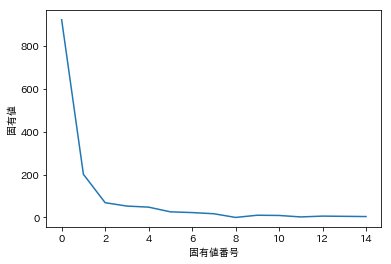

In [7]:
plt.plot(evd[0])
plt.xlabel('固有値番号')
plt.ylabel('固有値')
plt.show()

上記のグラフと「エルボー則」により、次元を2とする。

### PCAモデルの適用

PyODのPCAモデルには入力の標準化機能が含まれているため、標準化前の x を使用

In [8]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=2,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [9]:
scores = pca.decision_function(x)

### 異常度のグラフ作成

In [10]:
df_score = pd.DataFrame({'scores':scores})

In [11]:
df_score.index = df['Make']

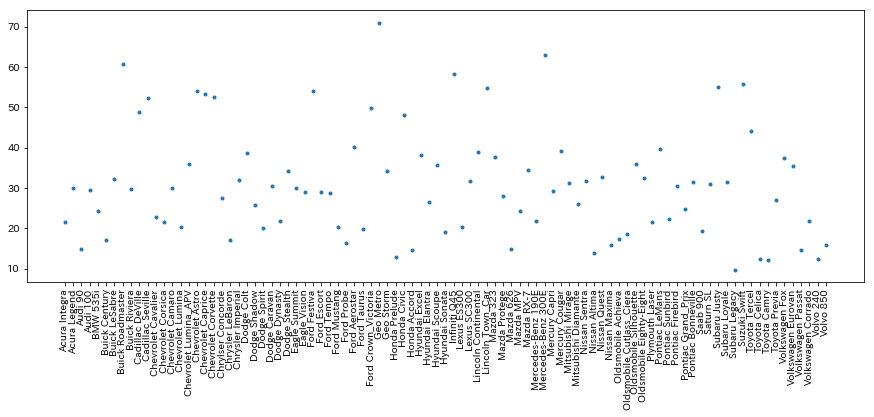

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df_score, '.')
plt.xticks(rotation=90)
plt.show()

In [13]:
df_score.sort_values(by='scores', ascending=False)[:6]

,scores
Make,
Geo Metro,70.977294
Mercedes-Benz 300E,62.895285
Buick Roadmaster,60.863477
Infiniti Q45,58.290789
Suzuki Swift,55.896864
Subaru Justy,55.134228


PyOD の PCA モジュールでの「異常度」は、各サンプルと特異ベクトルとの間の**重み付き**距離で定義されており、「入門 機械学習による異常検知」に示されている異常度とは異なる。

### 「入門 機械学習による異常検知」に掲載された手法による異常度計算

In [14]:
m = 2
x2 = evd[1][:,:m].T.dot(xc.T)
x2.shape

(2, 93)

In [15]:
a1 = (xc * xc).sum(axis=1) - (x2.T * x2.T).sum(axis=1)

In [16]:
a1_score = pd.DataFrame({'scores': a1})
a1_score.index = df['Make']

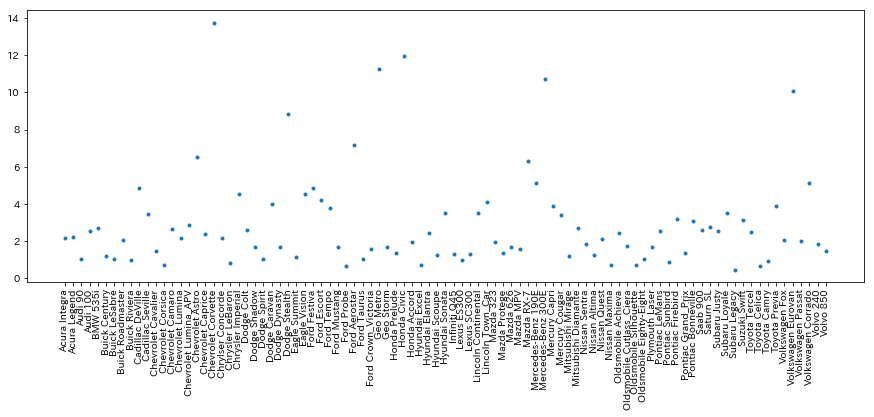

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(a1_score, '.')
plt.xticks(rotation=90)
plt.show()

In [18]:
a1_score.sort_values(by='scores', ascending=False)[:6]

,scores
Make,
Chevrolet Corvette,13.743611
Honda Civic,11.958326
Geo Metro,11.277632
Mercedes-Benz 300E,10.701090
Volkswagen Eurovan,10.079530
Dodge Stealth,8.822184
